IMPORTATION 01

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch

IMPORTATION 02

In [173]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from apyori import apriori
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [174]:
df = pd.read_csv( "Depression_Professional_Dataset.csv" )
print( df )

      Gender  Age  Work Pressure  Job Satisfaction     Sleep Duration  \
0     Female   37            2.0               4.0          7-8 hours   
1       Male   60            4.0               3.0          5-6 hours   
2     Female   42            2.0               3.0          5-6 hours   
3     Female   44            3.0               5.0          7-8 hours   
4       Male   48            4.0               3.0          7-8 hours   
...      ...  ...            ...               ...                ...   
2049  Female   45            1.0               3.0  Less than 5 hours   
2050    Male   25            1.0               5.0          5-6 hours   
2051  Female   23            3.0               1.0  Less than 5 hours   
2052  Female   24            1.0               4.0  Less than 5 hours   
2053  Female   56            2.0               3.0          7-8 hours   

     Dietary Habits Have you ever had suicidal thoughts ?  Work Hours  \
0          Moderate                               

In [175]:
df.shape

(2054, 11)

In [178]:
print("First 5 rows:")
df.head()

First 5 rows:


,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


data type and missing info

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   object 
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   object 
 10  Depression                             2054 non-null   object 
dtypes: f

In [ ]:
# Basic dataset information
print("Basic dataset info:")
print("=" * 40)
print(f"Total records: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print(f"Depression cases: {df['Depression'].value_counts()['Yes']}")
print(f"Non-depression cases: {df['Depression'].value_counts()['No']}")
print(f"Depression rate: {df['Depression'].value_counts(normalize=True)['Yes']:.2%}")
print("")
print("Column names and data types:")
print(df.dtypes)

Basic dataset info:
Total records: 2054
Number of features: 11
Depression cases: 203
Non-depression cases: 1851
Depression rate: 9.88%

Column names and data types:
Gender                                    object
Age                                        int64
Work Pressure                            float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Work Hours                                 int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object


In [180]:
# Check for missing values
print("Missing values check:")
print("=" * 30)
print(df.isnull().sum())

Missing values check:
Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [181]:
df.describe() 

,Age,Work Pressure,Job Satisfaction,Work Hours,Financial Stress
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,42.171860,3.021908,3.015093,5.930867,2.978578
std,11.461202,1.417312,1.418432,3.773945,1.413362
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,35.000000,2.000000,2.000000,3.000000,2.000000
50%,43.000000,3.000000,3.000000,6.000000,3.000000
75%,51.750000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000


In [182]:
df.describe( include='object')

,Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
count,2054,2054,2054,2054,2054,2054
unique,2,4,3,2,2,2
top,Male,7-8 hours,Unhealthy,No,No,No
freq,1066,530,713,1065,1046,1851


In [225]:
numerical_cols = ["Age", "Work Pressure", "Job Satisfaction", "Work Hours" , "Financial Stress" ] 
for col in numerical_cols:
    print("")
    print(f"{col} :")
    print(df[col].value_counts())


Age :
Age
56    73
49    72
38    71
47    66
46    64
51    63
50    63
42    63
53    63
57    62
35    61
40    61
59    61
43    59
39    59
48    59
54    59
41    57
45    57
36    56
37    51
55    51
44    51
60    50
58    49
52    46
18    36
33    36
31    35
29    35
28    34
34    32
25    32
24    32
27    31
26    30
23    29
20    28
22    28
30    27
21    24
19    21
32    17
Name: count, dtype: int64

Work Pressure :
Work Pressure
5.0    424
2.0    413
4.0    412
3.0    404
1.0    401
Name: count, dtype: int64

Job Satisfaction :
Job Satisfaction
5.0    431
2.0    431
3.0    404
1.0    396
4.0    392
Name: count, dtype: int64

Work Hours :
Work Hours
9     177
0     170
2     169
5     166
10    165
11    164
1     162
3     155
6     153
7     150
4     148
12    145
8     130
Name: count, dtype: int64

Financial Stress :
Financial Stress
2    447
4    407
1    407
5    405
3    388
Name: count, dtype: int64


In [224]:
categorical_cols = ['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?','Family History of Mental Illness', 'Depression']

for col in categorical_cols:
    print("")
    print(f"{col} :")
    print(df[col].value_counts())



Gender :
Gender
Male      1066
Female     988
Name: count, dtype: int64

Dietary Habits :
Dietary Habits
Unhealthy    713
Healthy      681
Moderate     660
Name: count, dtype: int64

Have you ever had suicidal thoughts ? :
Have you ever had suicidal thoughts ?
No     1065
Yes     989
Name: count, dtype: int64

Family History of Mental Illness :
Family History of Mental Illness
No     1046
Yes    1008
Name: count, dtype: int64

Depression :
Depression
No     1851
Yes     203
Name: count, dtype: int64


## Descriptive analytics: Display and interpret basic statistics for all attributes 

In [185]:
df.median(numeric_only=True)

Age                 43.0
Work Pressure        3.0
Job Satisfaction     3.0
Work Hours           6.0
Financial Stress     3.0
dtype: float64

In [186]:
df.mean(numeric_only=True)

Age                 42.171860
Work Pressure        3.021908
Job Satisfaction     3.015093
Work Hours           5.930867
Financial Stress     2.978578
dtype: float64

In [187]:
df.mode()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,56.0,5.0,2.0,7-8 hours,Unhealthy,No,9.0,2.0,No,No
1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Age

In [188]:
df['Age'].describe() 

count    2054.000000
mean       42.171860
std        11.461202
min        18.000000
25%        35.000000
50%        43.000000
75%        51.750000
max        60.000000
Name: Age, dtype: float64

<Axes: >

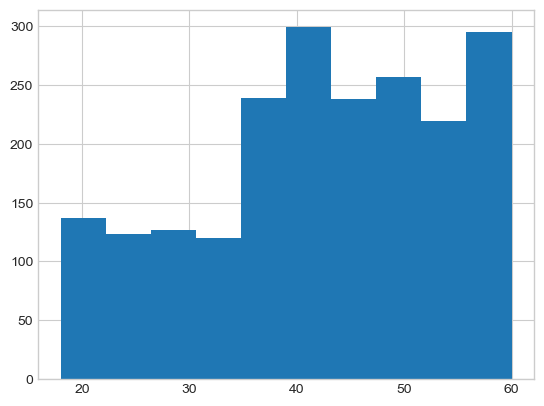

In [189]:
df['Age'].hist()

<Axes: >

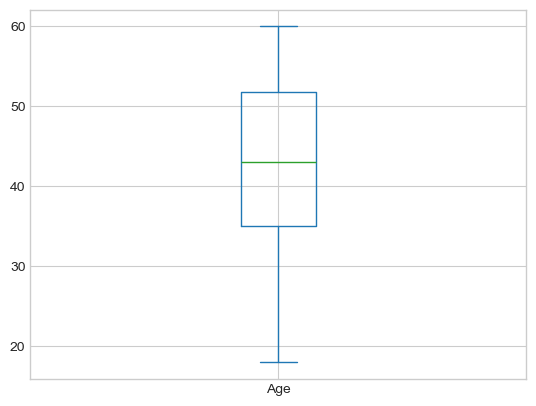

In [190]:
df['Age'].plot(kind = 'box')

#### Depression

In [191]:
df['Depression'].describe()

count     2054
unique       2
top         No
freq      1851
Name: Depression, dtype: object

<Axes: xlabel='Depression'>

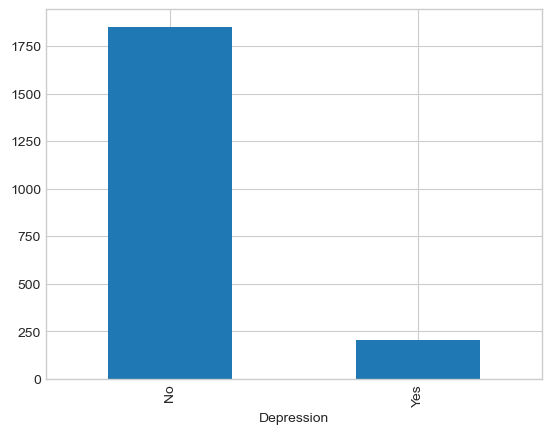

In [192]:
df['Depression'].value_counts().plot(kind = 'bar')

#### Dietary Habits

In [196]:
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    713
Healthy      681
Moderate     660
Name: count, dtype: int64

In [195]:
df['Dietary Habits'].value_counts(normalize=True)

Dietary Habits
Unhealthy    0.347128
Healthy      0.331548
Moderate     0.321324
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Dietary')

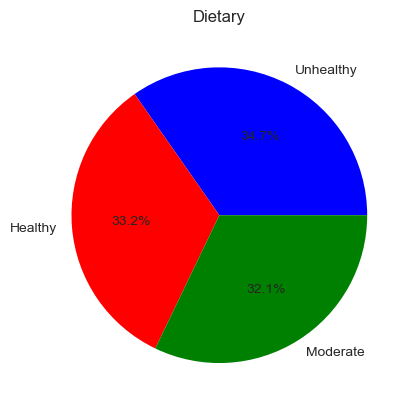

In [194]:
plt.plot()
diet = df['Dietary Habits'].value_counts()
plt.pie(diet.values, labels=diet.index, autopct='%1.1f%%', 
        colors=['blue', 'red','green'])
plt.title('Dietary')

#### Financial Stress

In [197]:
df['Financial Stress'].describe()

count    2054.000000
mean        2.978578
std         1.413362
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Financial Stress, dtype: float64

<Axes: xlabel='Financial Stress'>

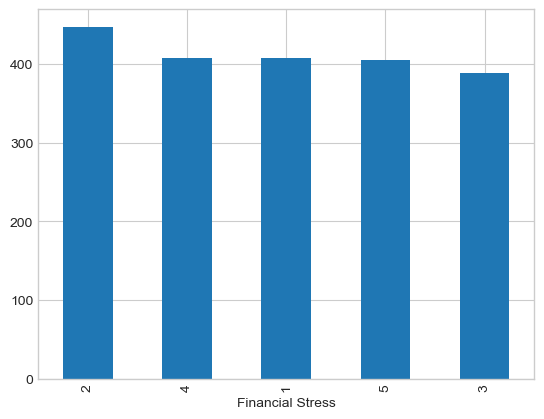

In [198]:
df['Financial Stress'].value_counts().plot(kind = 'bar')

#### Family History of Mental Illness

In [199]:
df['Family History of Mental Illness'].describe()

count     2054
unique       2
top         No
freq      1046
Name: Family History of Mental Illness, dtype: object

<Axes: xlabel='Family History of Mental Illness'>

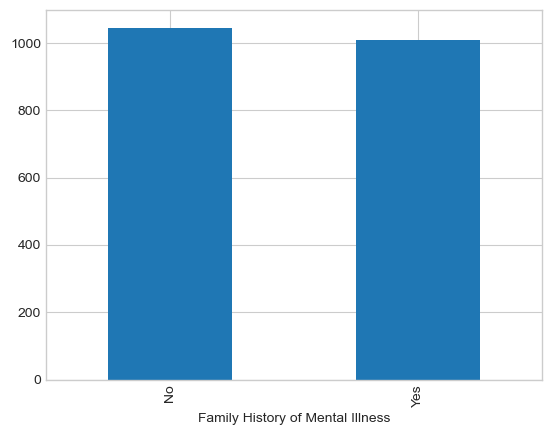

In [200]:
df['Family History of Mental Illness'].value_counts().plot(kind = 'bar')

#### Gender

<Axes: xlabel='Gender'>

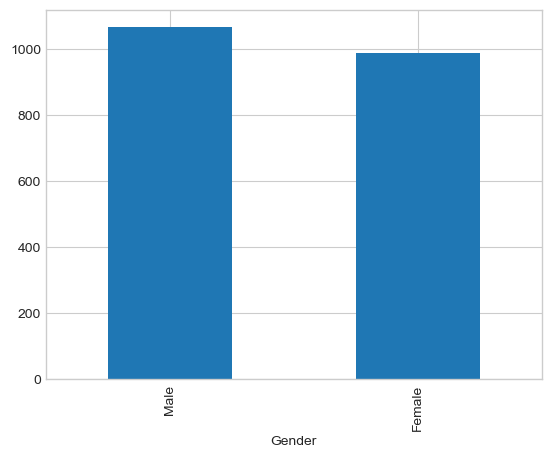

In [201]:
df['Gender'].value_counts().plot(kind = 'bar')

#### Work Pressure

<Axes: xlabel='Work Pressure'>

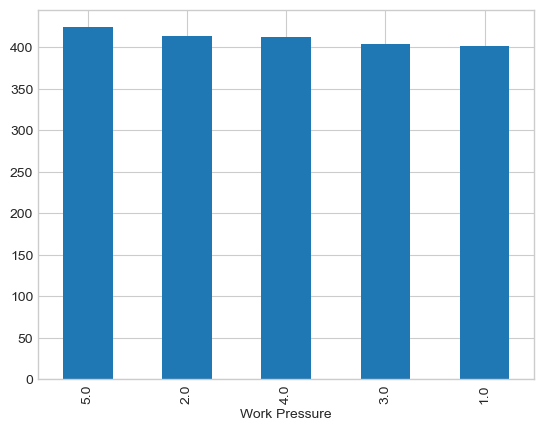

In [202]:
df['Work Pressure'].value_counts().plot(kind = 'bar')

In [203]:
df['Work Pressure'].describe()

count    2054.000000
mean        3.021908
std         1.417312
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Work Pressure, dtype: float64

#### Job Satisfaction

<Axes: xlabel='Job Satisfaction'>

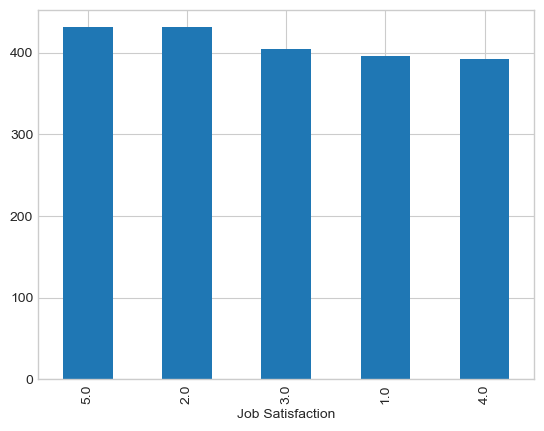

In [204]:
df['Job Satisfaction'].value_counts().plot(kind = 'bar')

#### Sleep Duration

<Axes: xlabel='Sleep Duration'>

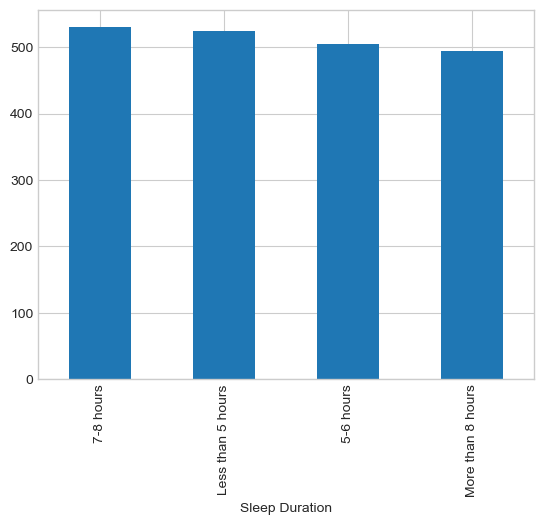

In [205]:
df['Sleep Duration'].value_counts().plot(kind = 'bar')

#### Have you ever had suicidal thoughts ?

<Axes: ylabel='count'>

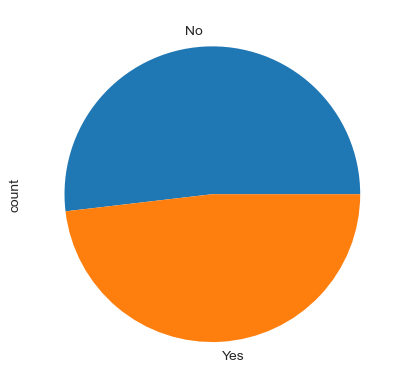

In [206]:
df['Have you ever had suicidal thoughts ?'].value_counts().plot(kind='pie')

#### Work Hours

<Axes: xlabel='Work Hours'>

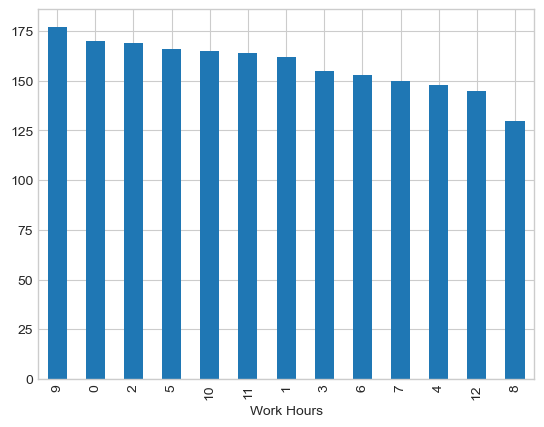

In [207]:
df['Work Hours'].value_counts().plot(kind = 'bar')

In [208]:
df['Work Hours'].value_counts(normalize=True)

Work Hours
9     0.086173
0     0.082765
2     0.082278
5     0.080818
10    0.080331
11    0.079844
1     0.078870
3     0.075463
6     0.074489
7     0.073028
4     0.072055
12    0.070594
8     0.063291
Name: proportion, dtype: float64

## Task 2 - Graph Visualisation

C:\Users\frank\AppData\Local\Temp\ipykernel_1932\1266309789.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([data_no, data_yes], labels=['No', 'Yes'], patch_artist=True, widths=0.6)


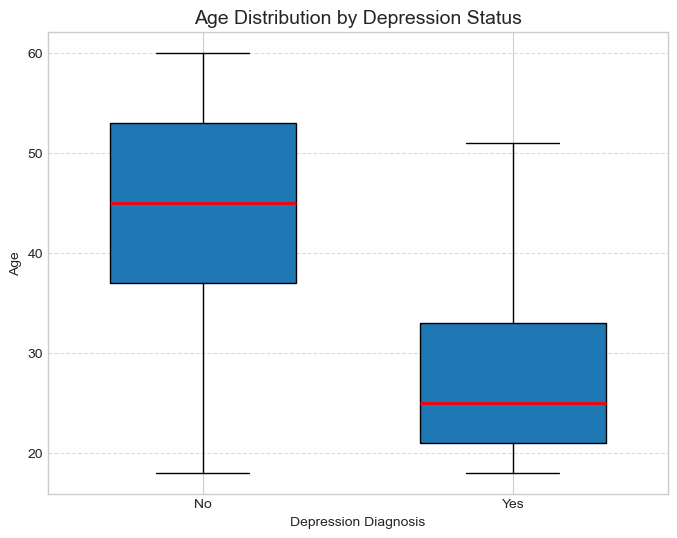

In [209]:
# Age and depression box plot
plt.figure(figsize=(8, 6))
data_no = df[df['Depression'] == 'No']['Age']
data_yes = df[df['Depression'] == 'Yes']['Age']

# Create plot
bp = plt.boxplot([data_no, data_yes], labels=['No', 'Yes'], patch_artist=True, widths=0.6)

# Style
for median in bp['medians']:
    median.set(color='red', linewidth=2)

plt.title('Age Distribution by Depression Status', fontsize=14)
plt.xlabel('Depression Diagnosis')
plt.ylabel('Age')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

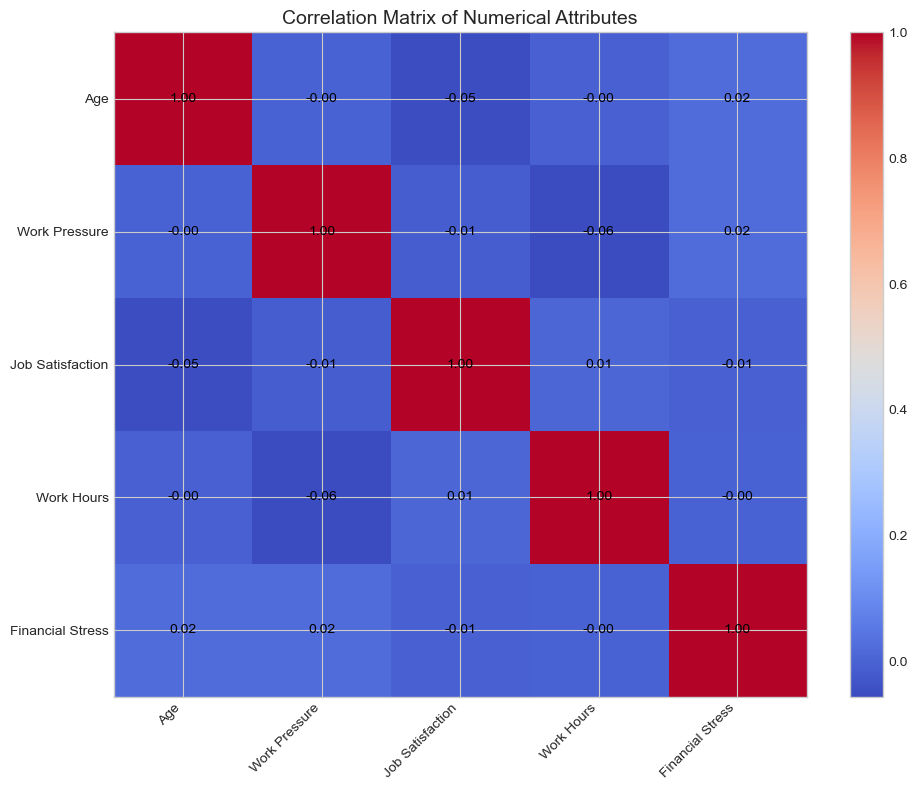

In [210]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
num_cols = df.select_dtypes(include=['number'])
corr = num_cols.corr()
plt.imshow(corr, cmap='coolwarm', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black")

plt.title('Correlation Matrix of Numerical Attributes', fontsize=14)
plt.tight_layout()
plt.show()

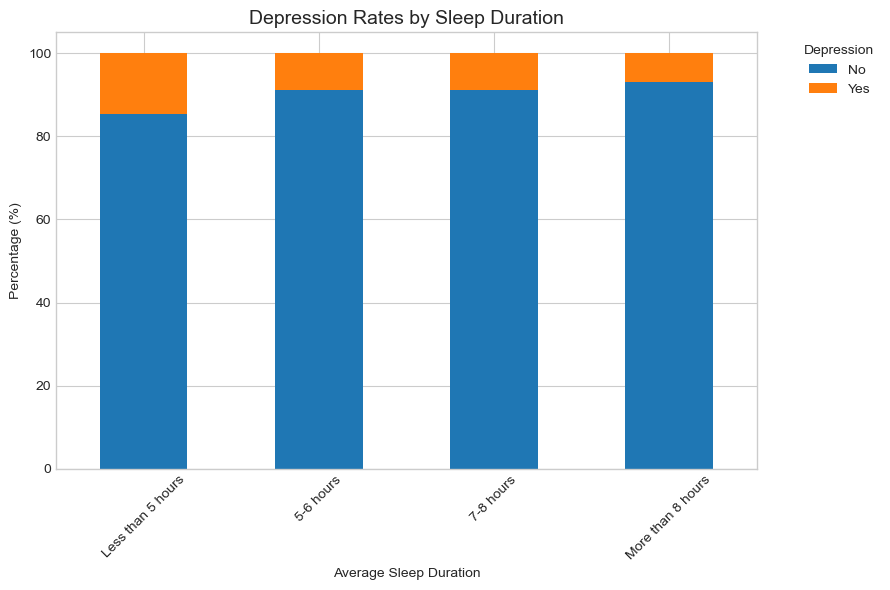

In [211]:
# Sleep Duration vs Depression
cross_tab = pd.crosstab(df['Sleep Duration'], df['Depression'], normalize='index') * 100

# Reorder indices to be logical if needed (e.g. Less than 5 -> 5-6 -> 7-8 -> More than 8)
# Checking current order from your previous output, it seems random. Let's force logical order:
order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
cross_tab = cross_tab.reindex(order)

ax = cross_tab.plot(kind='bar', stacked=True, figsize=(9, 6))
plt.title('Depression Rates by Sleep Duration', fontsize=14)
plt.xlabel('Average Sleep Duration')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

plt.legend(title='Depression', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

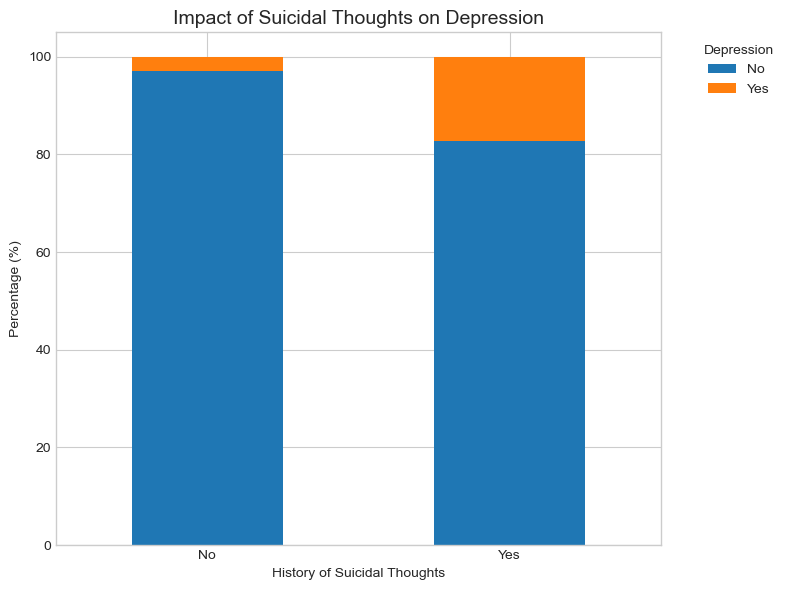

In [212]:
# Suicidal Thoughts vs Depression
cross_tab = pd.crosstab(df['Have you ever had suicidal thoughts ?'], df['Depression'], normalize='index') * 100
ax = cross_tab.plot(kind='bar', stacked=True,  figsize=(8, 6))
plt.title('Impact of Suicidal Thoughts on Depression', fontsize=14)
plt.xlabel('History of Suicidal Thoughts')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Depression', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

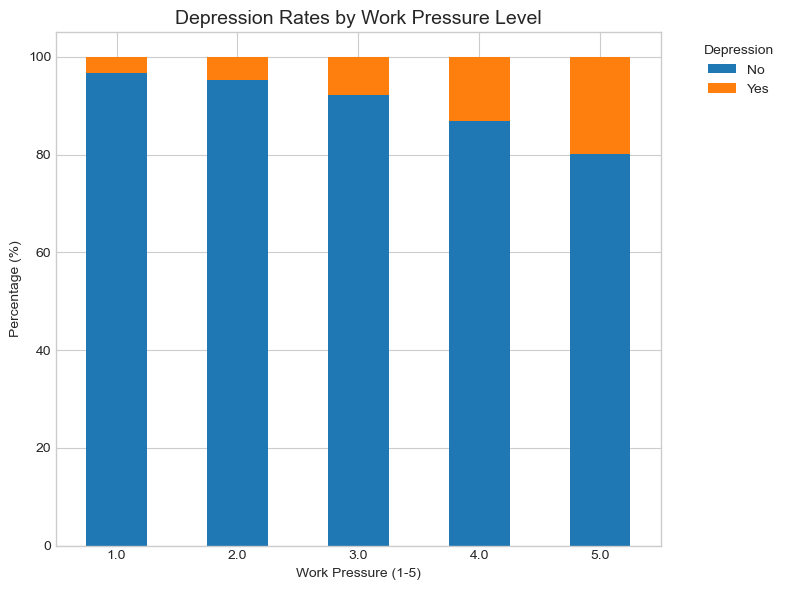

In [213]:
# work pressure vs depression 
cross_tab = pd.crosstab(df['Work Pressure'], df['Depression'], normalize='index') * 100
ax = cross_tab.plot(kind='bar', stacked=True,figsize=(8, 6))
plt.title('Depression Rates by Work Pressure Level', fontsize=14)
plt.xlabel('Work Pressure (1-5)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Depression', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Processing Categorical Variables 
le = LabelEncoder()
categorical_cols = ['Gender', 'Sleep Duration', 'Dietary Habits', 
            'Have you ever had suicidal thoughts ?', 
            'Family History of Mental Illness', 'Depression']

df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df[col])
X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']

# -------------------- （80% Train, 20% Test)  ----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data Split: 80% Train, 20% Test")
print(f"Training Samples: {len(X_train)}, Test Samples: {len(X_test)}")

# --------------------  Model Development  --------------------------
# Initialise the 3 selected algorithms
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
}

results_data = []
print("")
print("--- Model Evaluation Results ---")
for name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    print("")
    print(f"Algorithm: {name}")
    print(f"Accuracy: {acc:.2%}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    results_data.append({
        "Algorithm": name,
        "Accuracy": acc,
        "Precision (No)": report['0']['precision'],
        "Recall (No)": report['0']['recall'],
        "Precision (Yes)": report['1']['precision'],
        "Recall (Yes)": report['1']['recall'],
        "F1-Score (Yes)": report['1']['f1-score']
    })



results_df = pd.DataFrame(results_data)
print("")
print("--- Comparison Summary (Use this for Table 3) ---")
print(results_df.round(3))

Data Split: 80% Train, 20% Test
Training Samples: 1643, Test Samples: 411

--- Model Evaluation Results ---

Algorithm: Naive Bayes
Accuracy: 100.00%
Confusion Matrix:
[[370   0]
 [  0  41]]

Algorithm: Decision Tree
Accuracy: 100.00%
Confusion Matrix:
[[370   0]
 [  0  41]]

Algorithm: Random Forest
Accuracy: 100.00%
Confusion Matrix:
[[370   0]
 [  0  41]]
--- Comparison Summary (Use this for Table 3) ---
       Algorithm  Accuracy  Precision (No)  Recall (No)  Precision (Yes)  \
0    Naive Bayes       1.0             1.0          1.0              1.0   
1  Decision Tree       1.0             1.0          1.0              1.0   
2  Random Forest       1.0             1.0          1.0              1.0   

   Recall (Yes)  F1-Score (Yes)  
0           1.0             1.0  
1           1.0             1.0  
2           1.0             1.0  


In [ ]:
# =========================== we only drop age and keeps other in this version ========================
le = LabelEncoder()

df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df[col])
X = df_encoded.drop('Age', axis=1)  
# X = df_encoded.drop('Dietary Habits', axis=1)  
y = df_encoded['Age']

# 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Target Variable: Age")
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42, max_depth=5) 
    # Added max_depth=5 to prevent extreme overfitting, common practice in regression trees
}

results_list = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  
    r2 = r2_score(y_test, y_pred)
    
    print("")
    print(f"Model: {name}")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f} years")
    print(f"R2 Score: {r2:.4f}")
    results_list.append({
        "Algorithm": name,
        "MSE": mse,
        "RMSE (Years)": rmse,
        "R2 Score": r2
    })
results_df = pd.DataFrame(results_list)
print("")
print("--- Summary Table for Report (Task 3) ---")
print(results_df.round(4))

Target Variable: Age
Training Set: (1643, 10), Test Set: (411, 10)

Model: Linear Regression
MSE (Mean Squared Error): 101.17
RMSE (Root Mean Squared Error): 10.06 years
R2 Score: 0.2529

Model: Decision Tree Regressor
MSE (Mean Squared Error): 110.12
RMSE (Root Mean Squared Error): 10.49 years
R2 Score: 0.1869

--- Summary Table for Report (Task 3) ---
                 Algorithm       MSE  RMSE (Years)  R2 Score
0        Linear Regression  101.1740       10.0585    0.2529
1  Decision Tree Regressor  110.1165       10.4936    0.1869


In [228]:
# --------------------- Selected Features (Only Depression & Sleep Duration) --------------------------
features = ['Depression', 'Sleep Duration']
X_sel = df_encoded[features]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sel, y, test_size=0.2, random_state=42)

results_sel = []
for name, model in models.items():
    model.fit(X_train_s, y_train_s)
    y_pred = model.predict(X_test_s)
    mse = mean_squared_error(y_test_s, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_s, y_pred)
    results_sel.append({"Model": name, "MSE": mse, "RMSE": rmse, "R2": r2})

print("")
print("--- Impact of only depression and sleep duration on Age Prediction ---")
print(pd.DataFrame(results_sel).round(4))


--- Impact of only depression and sleep duration on Age Prediction ---
           Model  MSE  RMSE   R2
0    Naive Bayes  0.0   0.0  1.0
1  Decision Tree  0.0   0.0  1.0
2  Random Forest  0.0   0.0  1.0


In [ ]:

le = LabelEncoder()

df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df[col])

X_no_gender = df_encoded.drop(['Age', 'Gender'], axis=1)

results_list = []

def run_scenario(X, y, scenario_name):
    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        results_list.append({
            "Scenario": scenario_name,
            "Algorithm": name,
            "MSE": mse,
            "RMSE": rmse,
            "R2 Score": r2
        })

run_scenario(X_no_gender, df_encoded['Age'], "B. Experimental (No Gender)")

# Output
results_df = pd.DataFrame(results_list)
print("--- Impact of Removing Gender on Age Prediction ---")
print(results_df[['Scenario', 'Algorithm', 'MSE', 'RMSE', 'R2 Score']].round(4))


--- Impact of Removing Gender on Age Prediction ---
                      Scenario                Algorithm       MSE     RMSE  \
0  B. Experimental (No Gender)        Linear Regression  101.1491  10.0573   
1  B. Experimental (No Gender)  Decision Tree Regressor  110.1165  10.4936   

   R2 Score  
0    0.2531  
1    0.1869  


## Task 4 - ARM

In [ ]:


# Convert NUMBERS into LABELS 
df_arm = df.copy()

# 0-30: Young, 30-50: Mid, 50+: Old
df_arm['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Age_Young', 'Age_Mid', 'Age_Old'])

# 1-2: Low, 3: Medium, 4-5: High
df_arm['Pressure_Level'] = pd.cut(df['Work Pressure'], bins=[0, 2, 3, 5], labels=['Pressure_Low', 'Pressure_Med', 'Pressure_High'])

# Job Satisfaction
df_arm['Satisfaction_Level'] = pd.cut(df['Job Satisfaction'], bins=[0, 2, 3, 5], labels=['Sat_Low', 'Sat_Med', 'Sat_High'])

# Work Hours
df_arm['Work_Load'] = pd.cut(df['Work Hours'], bins=[-1, 5, 8, 13], labels=['Load_Low', 'Load_Med', 'Load_High'])


cols_to_use = ['Age_Group', 'Pressure_Level', 'Satisfaction_Level', 'Work_Load', 
               'Depression', 'Have you ever had suicidal thoughts ?', 'Sleep Duration']

df_tx = df_arm[cols_to_use].astype(str)

transactions = []
for i in range(len(df_tx)):
    transactions.append([str(df_tx.values[i, j]) for j in range(len(cols_to_use))])

print(f"Transactions prepared: {len(transactions)}")
print(f"Example transaction: {transactions[0]}")
print("--- Running Apriori ---")


Transactions prepared: 2054
Example transaction: ['Age_Mid', 'Pressure_Low', 'Sat_High', 'Load_Med', 'No', 'No', '7-8 hours']

--- Running Apriori ---


In [ ]:

if apriori:
    # rules = apriori(transactions, min_support=0.05, min_confidence=0.5, min_lift=1.1, min_length=2)
    rules = apriori(transactions, min_support=0.05, min_confidence=0.25, min_length=2)
    results_list = []
    for i in rules:
        pair = i[0] 
        items = [x for x in pair]
        base_support = i[1]
        
        for ordered_stat in i[2]:
            base_item = list(ordered_stat[0])
            add_item = list(ordered_stat[1])
            
            if len(add_item) == 1: # Simple rules A -> B
                cond = base_item[0] if len(base_item) > 0 else ""
                res = add_item[0]
                
                conf = ordered_stat[2]
                lift = ordered_stat[3]
                
                results_list.append({
                    "Rule": f"If {cond} -> Then {res}",
                    "Support": base_support,
                    "Confidence": conf,
                    "Lift": lift
                })
    rules_df = pd.DataFrame(results_list)
    top_rules = rules_df.sort_values(by='Lift', ascending=False).head(10)
    
    print("")
    print("--- Top Association Rules ---")
    print(top_rules[['Rule', 'Support', 'Confidence', 'Lift']].to_string())
else:
    print("Cannot run mining: 'apyori' module missing.")


--- Top Association Rules ---
                                  Rule   Support  Confidence      Lift
477       If Pressure_High -> Then Yes  0.050146    0.651899  1.311459
851              If No -> Then Age_Old  0.055501    0.363057  1.292409
839              If No -> Then Age_Old  0.054528    0.360129  1.281983
473             If No -> Then Sat_High  0.067186    0.498195  1.243369
456              If No -> Then Age_Old  0.142648    0.344706  1.227081
835              If No -> Then Age_Old  0.070107    0.339623  1.208986
865  If Load_High -> Then Pressure_Low  0.060857    0.478927  1.208497
453              If No -> Then Age_Old  0.060857    0.332447  1.183441
471         If No -> Then Pressure_Low  0.062804    0.465704  1.175130
861  If Load_High -> Then Pressure_Low  0.051120    0.464602  1.172349


## Task 5 - Clustering  


--- Generating Elbow Plot for K-Means ---


c:\Users\frank\.conda\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\frank\.conda\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\frank\.conda\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\frank\.conda\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

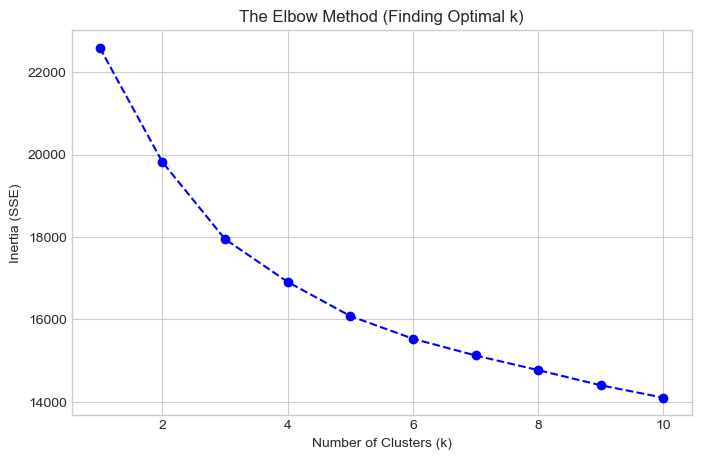

Selected k = 3


c:\Users\frank\.conda\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(



--- Generating Dendrogram for Hierarchical Clustering ---


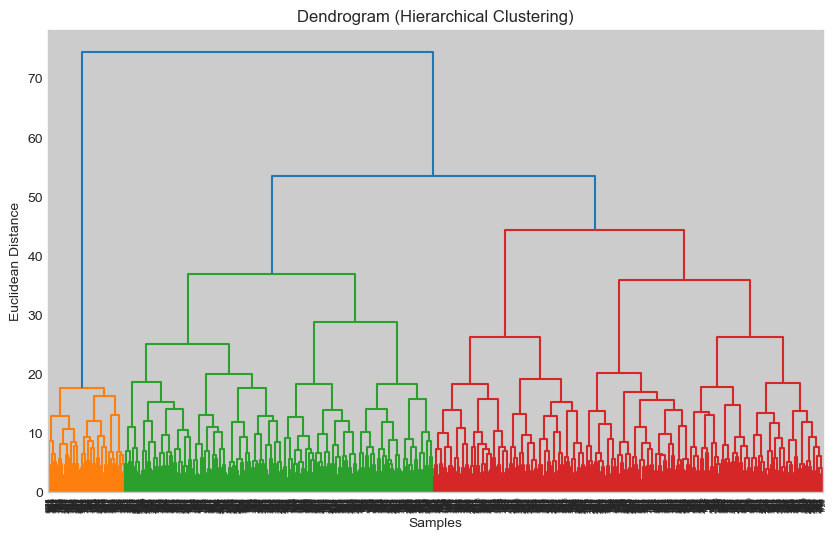


--- Silhouette Scores (k=3) ---
K-Means:      0.1226
Hierarchical: 0.1006

--- Cluster Interpretation (Average Values) ---
              Age  Work Pressure  Job Satisfaction  Work Hours  \
Cluster_ID                                                       
0           27.60           3.87              2.30        7.39   
1           45.34           2.82              3.12        5.64   
2           42.53           3.01              3.07        5.87   

            Financial Stress  
Cluster_ID                    
0                       3.63  
1                       2.86  
2                       2.94  

--- Cluster Sizes ---
Cluster_ID
2    1033
1     818
0     203
Name: count, dtype: int64


In [ ]:
le = LabelEncoder()
df_encoded = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df[col])

# B. Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=df_encoded.columns)

print("--- Generating Elbow Plot for K-Means ---")

# Calculate Inertia for k=1 to 10
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.title('The Elbow Method (Finding Optimal k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.grid(True)
plt.show()
k_optimal = 3
print(f"Selected k = {k_optimal}")
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
km_labels = kmeans_final.fit_predict(X_scaled)
km_score = silhouette_score(X_scaled, km_labels)
print("--- Generating Dendrogram for Hierarchical Clustering ---")
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Run final Hierarchical Clustering
hc_final = AgglomerativeClustering(n_clusters=k_optimal, metric='euclidean', linkage='ward')
hc_labels = hc_final.fit_predict(X_scaled)
hc_score = silhouette_score(X_scaled, hc_labels)

print(f"--- Silhouette Scores (k={k_optimal}) ---")
print(f"K-Means:      {km_score:.4f}")
print(f"Hierarchical: {hc_score:.4f}")

df['Cluster_ID'] = km_labels
key_cols = ['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']
cluster_profile = df.groupby('Cluster_ID')[key_cols].mean()
cluster_counts = df['Cluster_ID'].value_counts()
print("--- Cluster Interpretation (Average Values) ---")
print(cluster_profile.round(2))
print("--- Cluster Sizes ---")
print(cluster_counts)